# Fabric tensor of trabecular bone
Comparison with BoneJ/Anisotropy ImageJ plugin.

For a detailed explanation of the BoneJ plugin see: [https://bonej.org/anisotropy](https://bonej.org/anisotropy)

In [1]:
import os
import sys
# sys.path.insert(0, os.path.abspath('../'))
sys.path.append('/home/gianthk/PycharmProjects/recon_utils')
sys.path.append('/home/gianthk/PycharmProjects/pyfabric')

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pyfabric
import recon_utils as ru

astropy module not found
olefile module not found


In [3]:
%matplotlib widget

In [4]:
print(np.__file__)

/home/gianthk/anaconda3/envs/pyfabric/lib/python3.9/site-packages/numpy/__init__.py


In [17]:
# matplotlib.rcParams['figure.dpi'] = 200

# font = {'weight' : 'normal',
#         'size'   : 6}

# plt.rc('font', **font)

#### Read input data

In [5]:
# Trabecular bone scan
data_3D = ru.read_tiff_stack('/home/gianthk/Data/2019.001.coop_TUberlin_simulierte_Mensch.iorig/trabecular_samples/trabecular_sample_mini2/2000L_crop_imgaussfilt_60micron_uint8_0000.tif')
test = 1
# data_3D = ru.read_tiff_stack('/home/gianthk/Data/LHDL/3155_D_4_bc/cropped2/slice_000.tif')
# test = 0

Inspect dataset

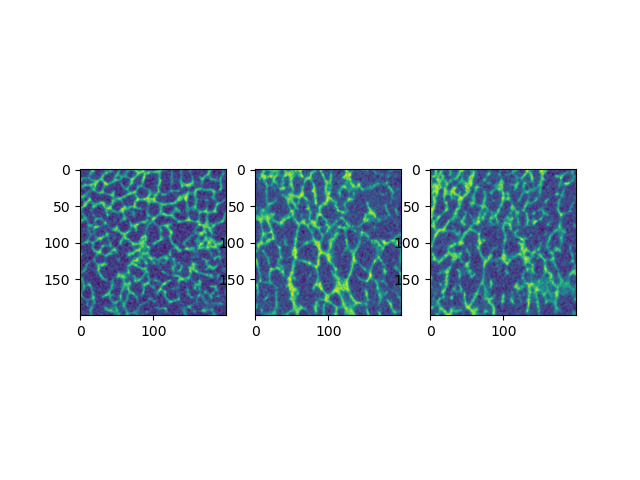

In [7]:
ru.plot_midplanes(data_3D)
plt.show()

### Compute fabric information with pyfabric

In [8]:
evecs, radii, evals, fabric_comp, DA = pyfabric.fabric(data_3D, zoom=True, zoom_factor=2, zoom_size=data_3D.shape[0]/4, ACFplot=False)

In [9]:
radii

array([10.46541546,  6.34776586,  5.71159262])

### Read results table from BoneJ

In [10]:
import pandas as pd

In [13]:
df = pd.read_csv('/home/gianthk/Data/2019.001.coop_TUberlin_simulierte_Mensch.iorig/trabecular_samples_bin/bonej_results.csv')
# df = pd.read_csv('/home/gianthk/Data/LHDL/3155_D_4_bc/cropped2_anisotropy_results_bonej.txt')

In [14]:
df.head()

,\,DA,Radius a,Radius b,Radius c,m00,m01,m02,m10,m11,m12,m20,m21,m22,D1,D2,D3
0,trabecular_sample_mini,0.550305,9.667777,10.830403,14.416763,-0.367184,-0.864930,-0.342158,0.926136,-0.305835,-0.220766,-0.086303,0.397946,-0.913340,0.004811,0.008525,0.010699
1,trabecular_sample_mini2,0.495877,10.571103,10.990377,14.888535,0.395505,0.899910,0.183680,0.907785,-0.352603,-0.227150,0.139648,-0.256581,0.956381,0.004511,0.008279,0.008949
2,trabecular_sample_mini3,0.533950,10.701554,11.116879,15.675837,-0.732929,-0.680283,0.005400,0.643813,-0.696158,-0.317599,0.219816,-0.229301,0.948210,0.004069,0.008092,0.008732


In [15]:
df['Radius a'][test]

10.571103049208778

In [16]:
radii_bj = df.iloc[test,2:5].to_numpy()

In [17]:
evecs_bj = np.reshape(df.iloc[test,5:14].tolist(), (3,3))

In [18]:
radii/np.max(radii)

array([1.        , 0.60654695, 0.5457588 ])

In [19]:
radii_bj/np.max(radii_bj)

array([0.7100163512979913, 0.7381772309268224, 1.0], dtype=object)

### Plot results

In [20]:
import ellipsoid_fit as ef

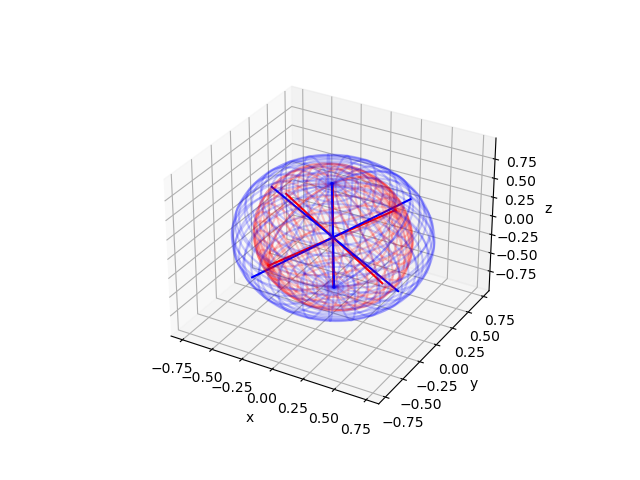

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(coors[:,0], coors[:,1], coors[:,2], zdir='z', s=0.4, c='b',rasterized=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ef.ellipsoid_plot([0, 0, 0], radii/np.max(radii), evecs, ax=ax, plot_axes=True, cage_color='red')
ef.ellipsoid_plot([0, 0, 0], radii_bj/np.max(radii_bj), evecs_bj, ax=ax, plot_axes=True, cage_color='blue')
plt.show()

https://github.com/matplotlib/ipympl
